## Penjelasan Dataset yang digunakan

In [ ]:
#1. Kasus yang diambil
Analisis sentimen terhadap ulasan produk/layanan Netizen Indonesia Language

# 2. Penjelasan setiap kolomnya
    a. product_name: Kategori produk atau layanan yang diulas ( Basic Online Course Learning (BOCL), Premium Online Learning (POL)).
    b. review_text: Teks Ulasan atau komentar pengguna (Fitur/Input X).
    c. sentiment: Label Sentimen Awal (Target/Output Y).

In [ ]:
pip install pandas matplotlib seaborn scikit-learn wordcloud nltk 

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.5 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [regex]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   -------------------------------- ------- 4/5 [wordcloud]
   ---------------------------------------- 5/5 [wordcloud]

Note: you may need to 


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl.metadata (909 bytes)
Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
# 3. Import library
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')

TEXT_COL = 'review_text'
LABEL_COL = 'sentiment'

df = df[[TEXT_COL, LABEL_COL]].dropna().rename(columns={TEXT_COL: 'text', LABEL_COL: 'label'})
df['label'] = df['label'].astype(str).str.strip()

label_map = {'0.0': 'negative', '0': 'negative',
             '1.0': 'neutral', '1': 'neutral',
             '2.0': 'positive', '2': 'positive'}

df['label'] = df['label'].map(lambda x: label_map.get(x, x))

[nltk_data] Downloading package punkt to C:\Users\M S
[nltk_data]     I\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\M S
[nltk_data]     I\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# 4. Load data
DATA_PATH = 'sentiment_NetizenIndonesianLangugage.csv'
df = pd.read_csv(DATA_PATH)
print('Shape dataset:', df.shape)
print('Columns:', df.columns.tolist())

df.head()

Shape dataset: (2194, 3)
Columns: ['product_name', 'review_text', 'sentiment']


,product_name,review_text,sentiment
0,Basic Online Course Learning (BOCL),"Materinya goks abis, auto paham! Instrukturnya...",2.0
1,Premium Online Learning (POL),"Platformnya anjay, interaktif banget, jadi gak...",2.0
2,Private Online Course Learning (POCL),"Mentornya pro player, ngajarnya santuy tapi ng...",2.0
3,Onsite Course Learning (OCL),"Sumpah, ini kursus paling oke! Ilmunya kepake ...",2.0
4,Private Course Onsite Learning (PCOL),Sertifikatnya nampol buat naikin CV. Vibes bel...,2.0


In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

In [28]:
# 1. Jumlah baris data
print(f"Jumlah Baris Data: {df.shape[0]}")
print(f"Jumlah Kolom Data: {df.shape[1]}")
print("\nInformasi Kolom:")
print(df.info())

Jumlah Baris Data: 15
Jumlah Kolom Data: 2

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    15 non-null     object
 1   label   15 non-null     object
dtypes: object(2)
memory usage: 360.0+ bytes
None


In [25]:
# 2. Panjang rata-rata setiap baris
obj_cols = [c for c in df.columns if df[c].dtype == object]
TEXT_COL = next((c for c in obj_cols if c.lower() in ("text","tweet","message","content","komentar","komen","tweet_text","body","review","post","isi","product_name")), obj_cols[0] if obj_cols else df.columns[0])

char_len = df[TEXT_COL].astype(str).apply(len)
word_len = df[TEXT_COL].astype(str).apply(lambda s: len(str(s).split()))
print('Rata-rata karakter:', char_len.mean())
print('Rata-rata kata:', word_len.mean())

Rata-rata karakter: 33.2
Rata-rata kata: 4.6


In [21]:
# 3. Cek data duplikasi
print(f"\nJumlah Data Duplikasi (sebelum dibersihkan): {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Data duplikasi telah dihapus.")
    print(f"Jumlah Baris Data Setelah Duplikasi dihapus: {df.shape[0]}")


Jumlah Data Duplikasi (sebelum dibersihkan): 2178
Data duplikasi telah dihapus.
Jumlah Baris Data Setelah Duplikasi dihapus: 15


In [17]:
# 4. Cek data kosong
print(df.isnull().sum())

product_name    0
review_text     0
sentiment       1
dtype: int64


label
positive    1026
negative     621
neutral      546
Name: count, dtype: int64


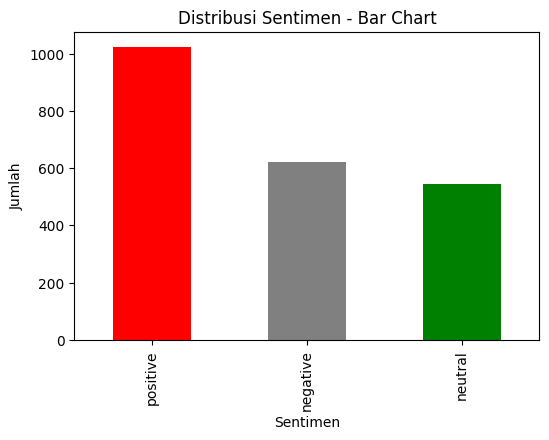

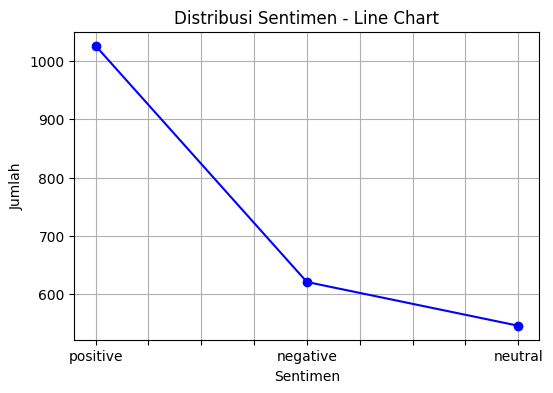

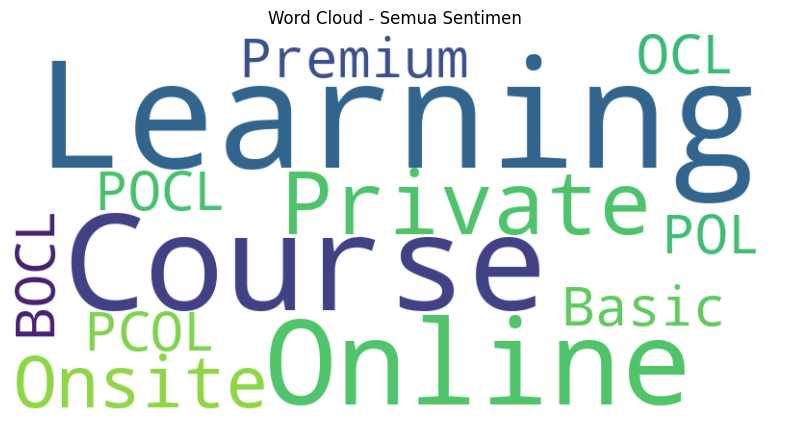

In [20]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.
LABEL_COL = next((c for c in df.columns if c.lower() in ("label", "sentiment", "target", "kelas", "class", "y", "sentimen")), None)

if LABEL_COL is None:
    for c in df.columns:
        if c != TEXT_COL and df[c].nunique() <= 10:
            LABEL_COL = c
            break

if LABEL_COL is None:
    LABEL_COL = df.columns[1] if df.shape[1] > 1 else df.columns[0]

label_map = {
    '0.0': 'negative', '0': 'negative',
    '1.0': 'neutral',  '1': 'neutral',
    '2.0': 'positive', '2': 'positive'
}

df = df[[TEXT_COL, LABEL_COL]].dropna().rename(columns={TEXT_COL: 'text', LABEL_COL: 'label'})
df['label'] = df['label'].astype(str).str.strip()
df['label'] = df['label'].map(lambda x: label_map.get(x, x))

print(df['label'].value_counts())

plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Distribusi Sentimen - Bar Chart')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='line', marker='o', color='blue')
plt.title('Distribusi Sentimen - Line Chart')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

from wordcloud import WordCloud

all_text = ' '.join(df['text'].astype(str).tolist())
wc = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Semua Sentimen')
plt.show()

## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

In [67]:
# 1. Tokenisasi
def tokenize_text(text):
    text = str(text).lower()
    tokens = word_tokenize(text)
    return tokens

df['tokens'] = df['text'].apply(tokenize_text)
print("Contoh tokenisasi:\n", df[['text', 'tokens']].head(), "\n")

Contoh tokenisasi:
                                                 text  \
0  Materinya goks abis, auto paham! Instrukturnya...   
1  Platformnya anjay, interaktif banget, jadi gak...   
2  Mentornya pro player, ngajarnya santuy tapi ng...   
3  Sumpah, ini kursus paling oke! Ilmunya kepake ...   
4  Sertifikatnya nampol buat naikin CV. Vibes bel...   

                                              tokens  
0  [materinya, goks, abis, ,, auto, paham, !, ins...  
1  [platformnya, anjay, ,, interaktif, banget, ,,...  
2  [mentornya, pro, player, ,, ngajarnya, santuy,...  
3  [sumpah, ,, ini, kursus, paling, oke, !, ilmun...  
4  [sertifikatnya, nampol, buat, naikin, cv, ., v...   



In [66]:
# 2. Lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['lemmatized'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
print(df[['text', 'tokens', 'lemmatized']].head())

                                                text  \
0  Materinya goks abis, auto paham! Instrukturnya...   
1  Platformnya anjay, interaktif banget, jadi gak...   
2  Mentornya pro player, ngajarnya santuy tapi ng...   
3  Sumpah, ini kursus paling oke! Ilmunya kepake ...   
4  Sertifikatnya nampol buat naikin CV. Vibes bel...   

                                              tokens  \
0  [materinya, goks, abis, ,, auto, paham, !, ins...   
1  [platformnya, anjay, ,, interaktif, banget, ,,...   
2  [mentornya, pro, player, ,, ngajarnya, santuy,...   
3  [sumpah, ,, ini, kursus, paling, oke, !, ilmun...   
4  [sertifikatnya, nampol, buat, naikin, cv, ., v...   

                                          lemmatized  
0  [materi, goks, abis, , auto, paham, , instrukt...  
1  [platform, anjay, , interaktif, banget, , jadi...  
2  [mentor, pro, player, , ngajarnya, santuy, tap...  
3  [sumpah, , ini, kursus, paling, oke, , ilmu, k...  
4  [sertifikat, nampol, buat, naikin, cv, , vibes..

In [65]:
# 3. Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stemmed'] = df['normalized'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
print(df[['normalized', 'stemmed']].head())

                                          normalized  \
0  [materinya, bagus sekali, habis, ,, otomatis, ...   
1  [platformnya, bagus sekali, ,, interaktif, sek...   
2  [mentornya, pro, player, ,, ajar, santai, teta...   
3  [sumpah, ,, ini, kursus, paling, bagus, !, ilm...   
4  [sertifikatnya, bagus sekali, buat, menaikkan,...   

                                             stemmed  
0  [materi, bagus sekali, habis, , otomatis, paha...  
1  [platform, bagus sekali, , interaktif, sekali,...  
2  [mentor, pro, player, , ajar, santai, tetapi, ...  
3  [sumpah, , ini, kursus, paling, bagus, , ilmu,...  
4  [sertifikat, bagus sekali, buat, naik, curricu...  


In [64]:
# 4. Stopword removal (Tanda baca, angka dan kata)
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

additional_stopwords = {
    'banget', 'aja', 'nih', 'dong', 'loh', 'yah', 'deh', 'gitu',
    'kayak', 'buat', 'biar', 'bikin', 'jadi', 'nya', 'nyaa', 'si',
    'sekali', 'ok', 'huhu', 'hehe', 'haha', 'wkwk', 'wkwkwk', 
    'yuk', 'yuks', 'ngena'
}
stopwords.update(additional_stopwords)

def remove_stopwords(tokens):
    cleaned = []
    for word in tokens:
        w = word.lower().translate(str.maketrans('', '', string.punctuation)).strip()
        if w and w not in stopwords and not w.isdigit():
            cleaned.append(w)
    return cleaned

df['clean_text'] = df['stemmed'].apply(remove_stopwords)
print(df[['stemmed', 'clean_text']].head())


                                             stemmed  \
0  [materi, bagus sekali, habis, , otomatis, paha...   
1  [platform, bagus sekali, , interaktif, sekali,...   
2  [mentor, pro, player, , ajar, santai, tetapi, ...   
3  [sumpah, , ini, kursus, paling, oke, , ilmu, k...   
4  [sertifikat, bagus sekali, buat, naik, curricu...   

                                          clean_text  
0  [materi, bagus sekali, habis, otomatis, paham,...  
1  [platform, bagus sekali, interaktif, malas, aj...  
2  [mentor, pro, player, ajar, santai, ilmu, dagi...  
3  [sumpah, kursus, paling, oke, ilmu, kepake, du...  
4  [sertifikat, bagus sekali, naik, curriculum vi...  


In [63]:
# 5. Text Normalisasi
normalization_dict = {
'gak': 'tidak',
    'nggak': 'tidak',
    'enggak': 'tidak',
    'ga': 'tidak',
    'gaksolusi': 'tidak solutif',
    'gaperlu': 'tidak perlu',
    'gakpaham': 'tidak paham',
    'gakngebosenin': 'tidak membosankan',
    'enggakngebosenin': 'tidak membosankan',
    'gakdiakui': 'tidak diakui',
    'nggakdiakui': 'tidak diakui',
    'gakjelek': 'tidak jelek',
    'gakrugi': 'tidak rugi',
    'kurenggg': 'kurang',
    'kureng': 'kurang',
    'kurangdalem': 'kurang dalam',
    'kurangupdate': 'kurang diperbarui',
    'bgt': 'banget',
    'bnget': 'banget',
    'bngt': 'banget',
    'bangetbanget': 'sangat',
    'abis': 'habis',
    'parah': 'sekali',
    'banget': 'sekali',
    'gimana': 'bagaimana',
    'gmana': 'bagaimana',
    'emang': 'memang',
    'ampe': 'sampai',
    'sampe': 'sampai',
    'samsek': 'sama sekali',
    'bikin': 'membuat',
    'gitu': 'begitu',
    'gituloh': 'begitu',
    'udah': 'sudah',
    'dapet': 'dapat',
    'kapanpun': 'kapan saja',
    'dimana-mana': 'di mana saja',
    'skrg': 'sekarang',
    'dulu': 'dahulu',
    'disana': 'di sana',
    'gue': 'saya',
    'gua': 'saya',
    'elu': 'kamu',
    'lo': 'kamu',
    'doi': 'dia',
    'dr': 'dari',
    'di': 'di',
    'kalo': 'kalau',
    'kayak': 'seperti',
    'kek': 'seperti',
    'cuman': 'hanya',
    'tapi': 'tetapi',
    'aja': 'saja',
    'sajalah': 'saja',
    'so-so': 'biasa saja',
    'b': 'biasa',
    'b aja': 'biasa saja',
    'mantap': 'bagus',
    'goks': 'bagus sekali',
    'anjay': 'bagus sekali',
    'nampol': 'bagus sekali',
    'mantul': 'mantap betul',
    'joss': 'bagus sekali',
    'pecah': 'bagus sekali',
    'asik': 'asyik',
    'santuy': 'santai',
    'GGWP': 'sangat bagus',
    'panutanque': 'panutan',
    'worth': 'bernilai',
    'worthit': 'bernilai',
    'zonk': 'buruk',
    'ampas': 'buruk',
    'redflag': 'buruk',
    'burik': 'buruk',
    'cetek': 'dangkal',
    'basi': 'tidak relevan',
    'lelet': 'lambat',
    'nge-lag': 'lambat',
    'ribet': 'rumit',
    'jadul': 'lama',
    'kaku': 'tidak fleksibel',
    'dicuekin': 'diabaikan',
    'ngejelasinnya': 'menjelaskannya',
    'ngebosenin': 'membosankan',
    'gercep': 'cepat',
    'cakep': 'bagus',
    'newbie': 'pemula',
    'kolab': 'kolaborasi',
    'ngajar': 'ajar',
    'ngajarnya': 'ajar',
    'naikin': 'menaikkan',
    'makannya': 'itulah sebabnya',
    'auto': 'otomatis',
    'vibes': 'suasana',
    'after': 'setelah',
    'cs': 'customer service',
    'cv': 'curriculum vitae',
    'poc': 'Private Online Course Learning',
    'bocl': 'Basic Online Course Learning',
    'pol': 'premium online learning',
    'ocl': 'Onsite Course Learning',
    'pcol': 'Private Online Course Learning',
    'mager': 'malas',
    'gitu-gitu': 'begitu-begitu',
    'muter-muter': 'berputar-putar',
    'panik': 'cemas',
    'oke': 'bagus',
    'kok': '',
    'dong': '',
    'nih': '',
    'deh': '',
    'ya': '',
    'loh': '',
    'lah': '',
    'sih': '',
    'hiks': '',
    'anjir': '',
    'anjai': '',
    'wih': '',
    'hadeuh': '',
    'hmmm': '',
    'pokoknya': '',
    'mah': ''

}

def normalize_tokens(tokens):
    return [normalization_dict.get(word, word) for word in tokens]

df['normalized'] = df['tokens'].apply(normalize_tokens)
print(df[['text', 'tokens', 'normalized']].head())


                                                text  \
0  Materinya goks abis, auto paham! Instrukturnya...   
1  Platformnya anjay, interaktif banget, jadi gak...   
2  Mentornya pro player, ngajarnya santuy tapi ng...   
3  Sumpah, ini kursus paling oke! Ilmunya kepake ...   
4  Sertifikatnya nampol buat naikin CV. Vibes bel...   

                                              tokens  \
0  [materinya, goks, abis, ,, auto, paham, !, ins...   
1  [platformnya, anjay, ,, interaktif, banget, ,,...   
2  [mentornya, pro, player, ,, ngajarnya, santuy,...   
3  [sumpah, ,, ini, kursus, paling, oke, !, ilmun...   
4  [sertifikatnya, nampol, buat, naikin, cv, ., v...   

                                          normalized  
0  [materinya, bagus sekali, habis, ,, otomatis, ...  
1  [platformnya, bagus sekali, ,, interaktif, sek...  
2  [mentornya, pro, player, ,, ajar, santai, teta...  
3  [sumpah, ,, ini, kursus, paling, bagus, !, ilm...  
4  [sertifikatnya, bagus sekali, buat, menaikkan,..

            ajar     bagus    banyak      baru     harga      ilmu  \
ajar    1.000000 -0.061552 -0.090534 -0.080307  0.002814  0.026527   
bagus  -0.061552  1.000000 -0.086110  0.037737 -0.007505  0.127457   
banyak -0.090534 -0.086110  1.000000  0.251351 -0.056063  0.147319   
baru   -0.080307  0.037737  0.251351  1.000000 -0.049730  0.073165   
harga   0.002814 -0.007505 -0.056063 -0.049730  1.000000  0.075364   

        instruktur     kalau    kurang    kursus  langsung     lebih  \
ajar     -0.058330 -0.079703 -0.102499 -0.030590 -0.087142 -0.029706   
bagus    -0.070191 -0.014204 -0.097491 -0.086913  0.074920 -0.047354   
banyak   -0.081945 -0.054542  0.047541 -0.062531 -0.059633  0.031444   
baru     -0.072689 -0.048381 -0.062219 -0.055468 -0.052897 -0.058438   
harga    -0.074154 -0.049357  0.029196 -0.056586 -0.053963 -0.059616   

         lumayan    materi       oke  platform      sama    sekali  \
ajar   -0.035210 -0.109802 -0.101026  0.080781 -0.126495  0.017170   
bagus 

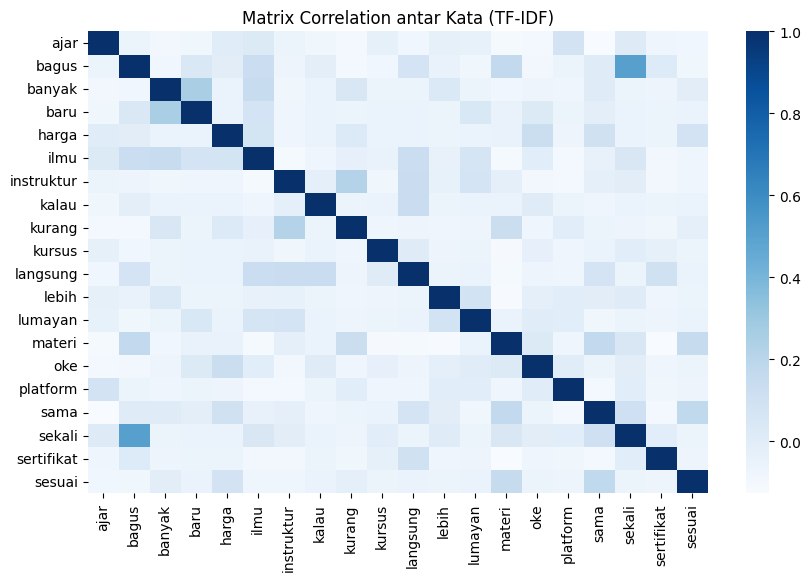

In [68]:
# 6. Matrix correlation (opsional)
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['clean_joined'] = df['clean_text'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(df['clean_joined'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
correlation_matrix = tfidf_df.corr()
print(correlation_matrix.head())

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap="Blues", annot=False)
plt.title("Matrix Correlation antar Kata (TF-IDF)")
plt.show()

In [76]:
# 7. Labeling Data (Lexicon-based Bahasa Indonesia)
lexicon_positive = {
    "bagus", "baik", "hebat", "senang", "puas", "suka", "mantap", "terbaik",
    "menarik", "keren", "bagus sekali", "recommended", "bermanfaat",
    "nyaman", "menyenangkan", "top", "oke", "lancar", "mudah", "paham",
    "interaktif", "memuaskan", "seru", "inspiratif", "kompeten", "cepat", "pro", "kepake"
}
lexicon_negative = {
    "buruk", "jelek", "kecewa", "sedih", "benci", "parah", "mengecewakan",
    "tidak puas", "tidak baik", "tidak bagus", "menyebalkan", "gagal",
    "payah", "kurang bagus", "kurang baik", "tidak nyaman", "tidak menarik",
    "biasa", "kurang", "lambat", "lemot", "error", "bug", "crash", "ngantuk",
    "tidak update", "kacau", "susah", "bingung", "jelek banget", "tidak jelas",
    "kurang jelas", "malas", "skip", "abai", "buruk sekali", "nyesel"
}
def get_sentiment(tokens):
    text = " ".join(tokens)

    pos_count = sum(phrase in text for phrase in lexicon_positive)
    neg_count = sum(phrase in text for phrase in lexicon_negative)

    if pos_count == 0 and neg_count == 0:
        for word in tokens:
            if word in lexicon_positive:
                pos_count += 1
            elif word in lexicon_negative:
                neg_count += 1

    if pos_count > neg_count:
        return "positif"
    elif neg_count > pos_count:
        return "negatif"
    else:
        return "netral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)
pd.set_option('display.max_colwidth', None)
print(df[["clean_text", "sentiment"]].head(10))


                                                                                                               clean_text  \
0                                 [materi, bagus sekali, habis, otomatis, paham, instruktur, asyik, bosan, fix, nila, it]   
1                                          [platform, bagus sekali, interaktif, malas, ajar, akses, kapan, mood, booster]   
2                                                        [mentor, pro, player, ajar, santai, ilmu, daging, semua, kaleng]   
3                                          [sumpah, kursus, paling, oke, ilmu, kepake, dunia, kerja, nyesel, sama sekali]   
4  [sertifikat, bagus sekali, naik, curriculum vitae, suasana, ajar, positif, thank, you, private online course learning]   
5                                                                       [materi, biasa, kurang, update, laen, ekspektasi]   
6                                                                       [instruktur, kurang, jelas, putar, ngantuk, skip]   


## Data Modeling

In [ ]:
Machine Learning Model-TF-IDF + Logistic Regression
Pendekatan ini berfungsi sebagai baseline untuk mengukur performa awal klasifikasi sentimen.
Representasi Data: TF-IDF
Algoritma: Logistic Regression
Alasan:
Cepat, ringan, dan mampu memberikan hasil yang cukup akurat pada dataset berukuran kecil.
Memiliki interpretabilitas tinggi (mudah menjelaskan bobot kata yang paling berpengaruh).

Deep Learning Model-LSTM (Long Short-Term Memory)
Untuk meningkatkan akurasi dan memahami konteks kalimat secara lebih mendalam, digunakan model LSTM, salah satu varian dari Recurrent Neural Network (RNN).
a. Konsep Dasar
    LSTM dirancang untuk memproses data sekuensial (seperti teks) dengan cara mengingat hubungan antar kata di sepanjang kalimat, yang tidak bisa dilakukan oleh model klasik.
b. Arsitektur Umum
    -Embedding Layer: Mengubah kata menjadi representasi vektor (Word Embedding) agar memiliki makna semantik.
    -LSTM Layer: Menangkap dependensi jangka panjang antar kata.
    -Dense Layer (Output): Mengklasifikasikan hasil ke dalam label sentimen positif, negatif, atau netral.

In [78]:
pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using ca


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
df['sentiment'].value_counts()


sentiment
netral     947
positif    713
negatif    533
Name: count, dtype: int64

In [94]:
#1. model machine learning-logistic regression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df['clean_text_str'] = df['clean_text'].apply(lambda x: ' '.join(x))

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text_str'])
y = df['sentiment'].map({'negatif':0, 'netral':1, 'positif':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("=== Logistic Regression Evaluation ===")
print(classification_report(y_test, y_pred_lr))
print("Akurasi:", accuracy_score(y_test, y_pred_lr))

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_text_str'])
X = tokenizer.texts_to_sequences(df['clean_text_str'])
max_len = max(len(x) for x in X)

X = pad_sequences(X, maxlen=max_len, padding='post')

y = df['sentiment'].map({'negatif':0, 'netral':1, 'positif':2}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_bilstm = Sequential([
    Embedding(input_dim=5000, output_dim=256, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_bilstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

loss, acc = model_bilstm.evaluate(X_test, y_test, verbose=0)
print("\n=== Bidirectional LSTM Evaluation ===")
print(f"Akurasi: {acc:.4f}")

=== Logistic Regression Evaluation ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       172
           2       1.00      1.00      1.00       159

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439

Akurasi: 1.0
Epoch 1/10


c:\Users\M S I\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.7201 - loss: 0.5814 - val_accuracy: 0.9954 - val_loss: 0.0134
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 4.0374e-04
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 1.6843e-04
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 1.0000 - loss: 5.8765e-04 - val_accuracy: 1.0000 - val_loss: 9.3382e-05
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 1.0000 - loss: 4.4915e-04 - val_accuracy: 1.0000 - val_loss: 5.4666e-05
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 1.0000 - loss: 2.4813e-04 - val_accuracy: 1.0000 - val_loss: 3.7747e-05
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 1.0000 - loss: 2.3174e-04 - val_accuracy: 1.0000 - val_loss: 2.6717e-05
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 1.0000 - loss: 2.21

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='saga', max_iter=1000)
)

pipeline.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi data uji
y_pred = pipeline.predict(X_test)

# Evaluasi akurasi
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Evaluasi detail
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

LogisticRegression(multi_class='multinomial', solver='saga',)

Test Accuracy: 0.530751708428246
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.17      0.26       108
           1       0.52      0.83      0.64       172
           2       0.56      0.46      0.50       159

    accuracy                           0.53       439
   macro avg       0.54      0.48      0.46       439
weighted avg       0.54      0.53      0.49       439

Confusion Matrix:
 [[ 18  58  32]
 [  4 142  26]
 [ 11  75  73]]


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'multinomial'


## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 


In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

## Data Prediksi

In [ ]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru